In [237]:
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [238]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [239]:
df.shape

(41188, 21)

In [240]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [241]:
X = df.drop(columns='y')
y = df['y']
X.shape, y.shape

((41188, 20), (41188,))

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initial Baseline Model
- Naive Baseline

In [243]:
y_train = y_train.replace({'no':0,'yes':1})
y_test = y_test.replace({'no':0,'yes':1})

In [244]:
features = ['age', 'previous']

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train[features], y_train)

y_test_pred = logreg.predict(X_test[features])
y_train_pred_proba = logreg.predict_proba(X_train[features])[:,1]
y_test_pred_proba = logreg.predict_proba(X_test[features])[:,1]


score = logreg.score(X_train[features], y_train)
print('Train Accuracy Score:', score)
score = logreg.score(X_test[features], y_test)
print('Test Accuracy Score:', score)
print('Test F1 Score:', f1_score(y_test, y_test_pred))
print('Test ROC AUC Score:', roc_auc_score(y_test, y_test_pred_proba))

Train Accuracy Score: 0.8884066767830046
Test Accuracy Score: 0.8896576839038601
Test F1 Score: 0.0752797558494405
Test ROC AUC Score: 0.5881230394122365


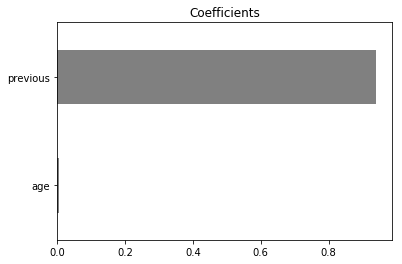

In [245]:
plt.title('Coefficients')
coefficients = logreg.coef_[0]
feature_names = X_train[features].columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='gray');

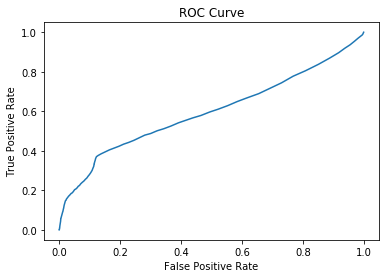

In [246]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Exploratory Analysis

In [247]:
X_train.isnull().sum().sum()

0

In [248]:
y_train.value_counts(normalize=True)

0    0.887344
1    0.112656
Name: y, dtype: float64

In [249]:
X_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [250]:
X_train.describe(include='number')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719,0.080470,93.575881,-40.508489,3.618395,5166.899651
std,10.403636,258.975917,2.752326,187.951096,0.499025,1.571266,0.579209,4.628223,1.735896,72.434812
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [251]:
X_train.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416


In [252]:
X_train['month'].value_counts()

may    11011
jul     5763
aug     4948
jun     4247
nov     3266
apr     2085
oct      587
sep      464
mar      436
dec      143
Name: month, dtype: int64

## Approach to feature engineering

In [253]:
X_train.shape

(32950, 20)

In [254]:
import numpy as np

np.where( [(X_train['pdays']>7) & (X_train['pdays'] < 100)], 1, 0)

array([[0, 0, 0, ..., 0, 0, 0]])

In [255]:
def prepare_features(X):
    X = X.copy()
    X['pdays<=7'] = np.where( X['pdays'] <= 7, 1, 0)
    X['7<pdays<=14'] = np.where( (X['pdays'] < 14) & (X['pdays'] > 7), 1, 0)
    X['14<pdays<=21'] = np.where( (X['pdays'] <= 21) & (X['pdays'] > 14), 1, 0)
    X['21<pdays<=28'] = np.where( (X['pdays'] <= 28) & (X['pdays'] > 21), 1, 0)
    X['pdays=na'] = np.where( X['pdays'] > 28, 1, 0)
    X = X.drop(columns=['duration','pdays'], axis=1)
    return X

In [256]:
X_train = prepare_features(X_train)
X_test = prepare_features(X_test)
X_train.shape, X_test.shape

((32950, 23), (8238, 23))

# Pipeline

In [257]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [258]:
X_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pdays<=7            int64
7<pdays<=14         int64
14<pdays<=21        int64
21<pdays<=28        int64
pdays=na            int64
dtype: object

In [265]:
import category_encoders as ce

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [260]:
cat_features = X_train.select_dtypes('object').columns.tolist()

scale_features = X_train.select_dtypes('float').columns.tolist()
scale_features.append( 'campaign' )
scale_features.append( 'previous' )

In [261]:
one_hot_processing = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True)
)
standard_processing = make_pipeline(
    StandardScaler(),
    SimpleImputer(strategy='mean')
)

preprocess = make_column_transformer(
    (one_hot_processing, cat_features),
    (standard_processing, scale_features)
)

In [262]:
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    preprocess,
    LogisticRegression(solver='lbfgs', class_weight=None, max_iter=1000)
)

In [266]:
def run_log_reg(X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    print('Test Accuracy Score:', score)
    print('Test F1 Score:', f1_score(y_test, y_pred))
    print('Test ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))
    
    conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                           columns=['Predicted Negative', 'Predicted Positive'],
                           index=['Actual Negative','Actual Positive'])
    print(conf_mat)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr)
    plt.title('Test ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

Test Accuracy Score: 0.9007040543821316
Test F1 Score: 0.33060556464811786
Test ROC AUC Score: 0.8007582904854003
                 Predicted Negative  Predicted Positive
Actual Negative                7218                  92
Actual Positive                 726                 202


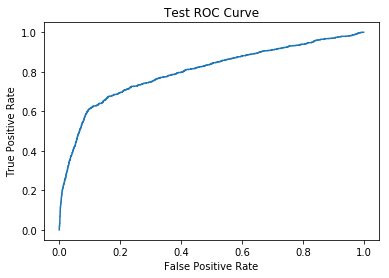

In [267]:
run_log_reg(X_train, X_test, y_train, y_test)